In [232]:
# importo sympy
import sympy as sy
from sympy import init_printing,pi,symbols,sqrt,sin,Function,integrate,oo,diff,I, conjugate
from sympy.physics.quantum.constants import hbar
import scipy.constants as scc
init_printing()

# Definimos las funciones phi(n,L,x) función de pozo infinito
x = symbols('x', real=True)
L = symbols('L', real=True,positive=True)
n = symbols('n', integer=True,positive=True)

def phi(n,L,x):
    arg =   n * (pi / L) * x 
    psi =  sqrt(2/L) *  sin(arg)
    return psi

In [233]:
import cmath 

In [234]:
h = hbar
n1 = n2 = n
def momento (f,x) : #acá defino el operador momento
    j = sqrt(-1)
    pp = -j*h * diff(f,x)
    return pp
p = momento(phi(n2,L,x),x)
sy.simplify (integrate(phi(n,L,x)*p,(x,0,L))) #acá está <p>

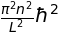

In [235]:
# ahora calculo <p^2> 
def momento2 (f,x) : #acá defino el operador momento al cuadrado
    j = sqrt(-1)
    p2 = -(h**2)*diff(f,x,x)
    return p2
p22 = momento2 (phi(n,L,x),x)
sy.simplify (integrate(phi(n,L,x)*(p22),(x,0,L))) #este es <p^2>


In [236]:
#calculo los deltas x y p para el principio de incertidumbre tal que:
def xmed(n,L): 
    y = integrate(phi(n,L,x)*x*phi(n,L,x),(x,0,L)) 
    return sy.simplify(y)
xmed (n,L) #acá calculo <x> 

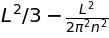

In [237]:
def xmed2 (n,L) :
    z = integrate(phi(n,L,x)*(x**2)*phi(n,L,x),(x,0,L)) 
    return sy.simplify(z)
sy.simplify(xmed2(n,L)) #acá calculo <x^2> 
 

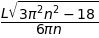

In [238]:
#entonces Delta x se escribe como sigma x al cuadrado
def Deltax (n,L):
    return sy.simplify(sqrt(xmed2 (n,L) -(xmed (n,L))**2))
Deltax (n,L)

In [239]:
#por lo que Delta p es:
def Deltap(n,L):
    return sy.simplify (sqrt(sy.simplify (integrate(phi(n,L,x)*(p22),(x,0,L))) -(sy.simplify (integrate(phi(n,L,x)*p,(x,0,L))))**2))
Deltap (n,L)

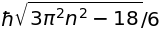

In [240]:
#Tomo ahora la multiplicación de ambos deltas para obtener el principio de incertidumbre:
ppio = Deltap(n,L) * Deltax (n,L)

ppio

In [241]:
# pruebo para n = 1 y si me da mayor a h/2 funciona...
pio = ppio.subs(n,1)
pio.evalf()

In [242]:
if pio.evalf() >= h/2: # comparo con hbar/2
    print ("Funciona el principio de incertidumbre")

Funciona el principio de incertidumbre


In [264]:
import numpy as np
m = symbols('m', integer = True, positive=True)
def Ppio(m):# defino a ppio como función de n
    return (scc.hbar/6) * np.sqrt(3*(np.pi**2) * (m**2) -18)
Ppio(1)

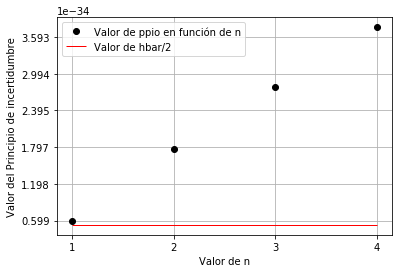

In [307]:
import matplotlib.pyplot as plt


m = np.arange(1,5,1)
plt.plot(m,Ppio(m),"ko", label= "Valor de ppio en función de n")
plt.hlines(y=scc.hbar/2, xmin=1, xmax=4, lw=1, color='r', label = "Valor de hbar/2")
plt.ylabel("Valor del Principio de incertidumbre")
plt.xlabel("Valor de n")
plt.xticks(np.arange(1,5,1))
plt.yticks(np.arange(Ppio(1),Ppio(4), Ppio(1)))
plt.legend()
plt.grid(True)#Gráfico de los distintos valores del ppio de incertidumbre en función de n comparados con hbar/2